### Setting paths and imports

In [ ]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

os.chdir(module_path)

# from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer

from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

config_f_name = 'generate_minimize/bbbp/dce/dce-lcls/generate_minimize7.jsonc'

### Evaluating the explainer

In [2]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Users\rodri\OneDrive\Documents\Projects\GRETEL stuff\GRETEL\lab\config\generate_minimize/bbbp/dce/dce-random/generate_minimize7.jsonc
2024-11-25 19:09:07,1686326852 | INFO | 24764 - Executing: c:\Users\rodri\OneDrive\Documents\Projects\GRETEL stuff\GRETEL\lab\config\generate_minimize/bbbp/dce/dce-random/generate_minimize7.jsonc Run: 1
2024-11-25 19:09:07,1686326860 | INFO | 24764 - Creating the evaluation manager....................................
2024-11-25 19:09:07,1686326876 | INFO | 24764 - Creating the evaluators......................................................
2024-11-25 19:09:09,1686329517 | INFO | 24764 - Loading: BBBP-c0cc58bdf4acf93936322304bf6b669e
2024-11-25 19:09:12,1686331755 | INFO | 24764 - Created: BBBP-c0cc58bdf4acf93936322304bf6b669e
2024-11-25 19:09:12,1686331759 | INFO | 24764 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-11-25 19:09:12,1686331759 | INFO | 24764 - Instantiating: torch.optim.RMSprop
2024-11-25 19:09:12,168633

In [3]:
exp_inst = []
for exp in eval_manager.evaluators[0]._explanations:
    exp.input_instance._dataset = None
    exp.counterfactual_instances[0]._dataset = None
    
exp_inst = [(exp.input_instance, exp.counterfactual_instances[0]) for exp in eval_manager.evaluators[0]._explanations]

In [4]:
import os
import pickle

pickle_path = os.path.join(module_path, 'lab', 'pickles', 'union.pkl')
pickle_dir = os.path.dirname(pickle_path)

if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)

with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(exp_inst, pickle_file)

In [5]:
with open(os.path.join(module_path, 'lab', 'pickles', 'union.pkl'), 'rb') as clear_file:
    clear_exp = pickle.load(clear_file)

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,FeatureEditDistance,FeatureEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std
0,meta,BBBP-c0cc58bdf4acf93936322304bf6b669e,OracleTorch-67fdf45735a1c8aaece5ab786ca3c38e,GenerateMinimize(DCESExplainer-Random),10.564593,0.109784,10.450980,0.058824,128.746100,3.061536,1.000,0.0,6037.196078,9.803922,0.879902,0.026961,0.069879,0.000697
1,meta,Synthie-2703e12cc033a6e1b64e835e11da25e3,OracleTorch-5449ec726ac893cfdaed806068e27c41,GenerateMinimize(OFS-LocalSearch),42.878015,0.000000,2.517241,0.000000,535.089379,0.000000,0.725,0.0,11915.000000,0.000000,1.000000,0.000000,0.014240,0.000000
2,meta,TreeCyclesRand-816d9573c8d4034bb1548767b763a7df,TreeCyclesOracle-d594b0c435b9cedcbcc26285b9f4628f,GenerateMinimize(DCESExplainer-Random),29.101334,0.000000,2.440000,0.000000,0.000000,0.000000,1.000,0.0,4258.000000,0.000000,1.000000,0.000000,0.005408,0.000000
3,meta,TreeCyclesRand-b54b4ef742820fb7103abeb47079a114,TreeCyclesOracle-f1d4659f98cc0dd1e9e5ef753c5ebf12,GenerateMinimize(OFS-LocalSearch),0.044190,0.000000,1.076923,0.000000,0.000000,0.000000,1.000,0.0,32.384615,0.000000,1.000000,0.000000,0.025730,0.000000


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

# Drawing Instances

In [9]:
import pickle

with open(os.path.join(module_path, 'lab', 'pickles', 'cf2.pkl'), 'rb') as cf2_file:
    cf2_exp = pickle.load(cf2_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'clear.pkl'), 'rb') as clear_file:
    clear_exp = pickle.load(clear_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'irand.pkl'), 'rb') as irand_file:
    irand_exp = pickle.load(irand_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'obs.pkl'), 'rb') as obs_file:
    obs_exp = pickle.load(obs_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'rsgg.pkl'), 'rb') as rsgg_file:
    rsgg_exp = pickle.load(rsgg_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'bidirectional.pkl'), 'rb') as bi_file:
    bi_exp = pickle.load(bi_file)

with open(os.path.join(module_path, 'lab', 'pickles', 'union.pkl'), 'rb') as union_file:
    union_exp = pickle.load(union_file)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\rodri\\OneDrive\\Documents\\Projects\\GRETEL stuff\\GRETEL\\lab\\pickles\\cf2.pkl'

In [ ]:
i = 7

og_inst = cf2_exp[i][0]
cf2_cf = cf2_exp[i][1]
print(og_inst.id, cf2_cf.id)

clear_cf = clear_exp[i][1]
print(clear_exp[i][0].id, clear_cf.id)

irand_cf = irand_exp[i][1]
print(irand_exp[i][0].id, irand_cf.id)

obs_cf = obs_exp[i][1]
print(obs_exp[i][0].id, obs_cf.id)

rsgg_cf = rsgg_exp[i][1]
print(rsgg_exp[i][0].id, rsgg_cf.id)

union_cf = union_exp[i][1]
print(union_exp[i][0].id, union_cf.id)

bi_cf = bi_exp[i][1]
print(bi_exp[i][0].id, bi_cf.id)

7 7
7 7
7 7
7 7
7 7
7 7
7 7


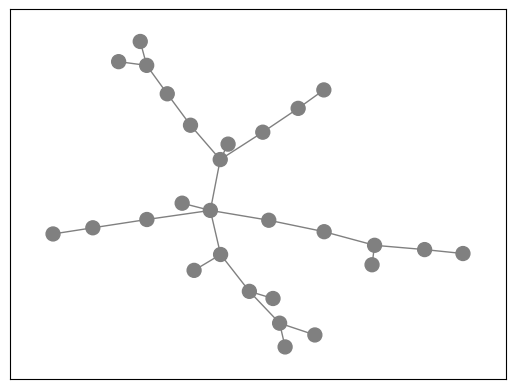

In [ ]:
pos = data_analyzer.draw_graph(og_inst)

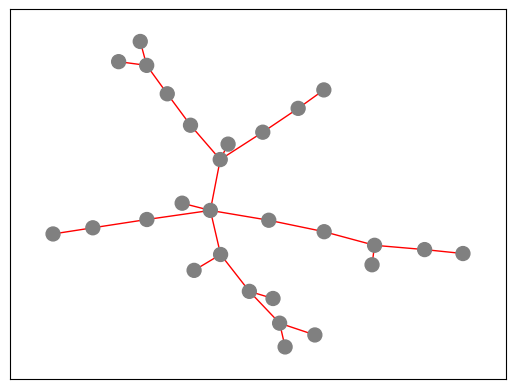

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, cf2_cf, position=pos)

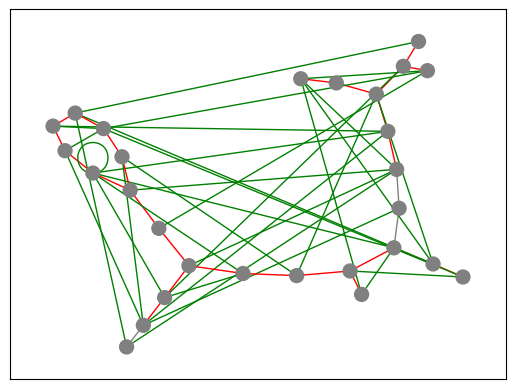

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, clear_cf, position=pos)

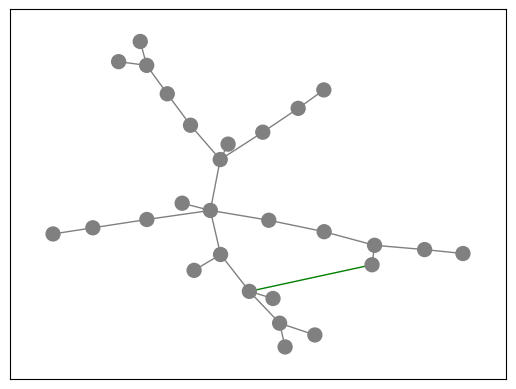

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, irand_cf, position=pos)

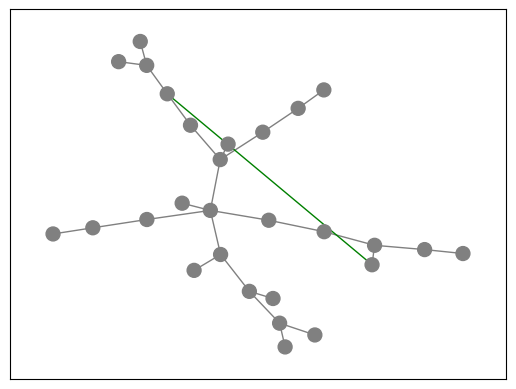

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, obs_cf, position=pos)

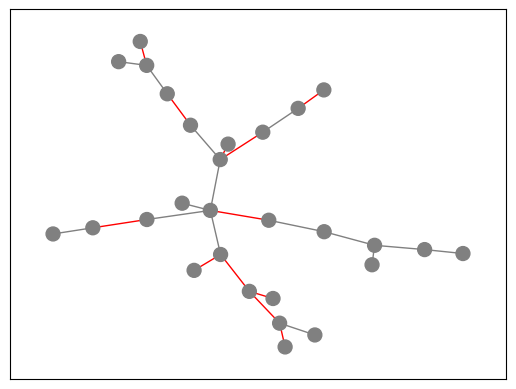

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, rsgg_cf, position=pos)

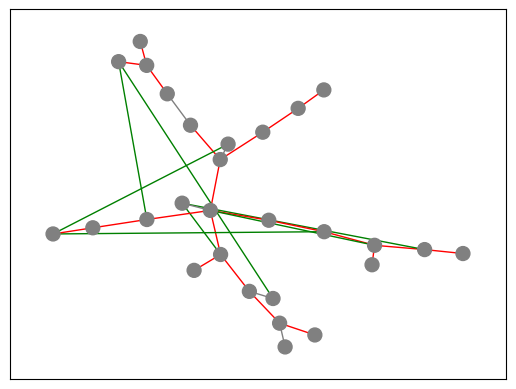

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, union_cf, position=pos)

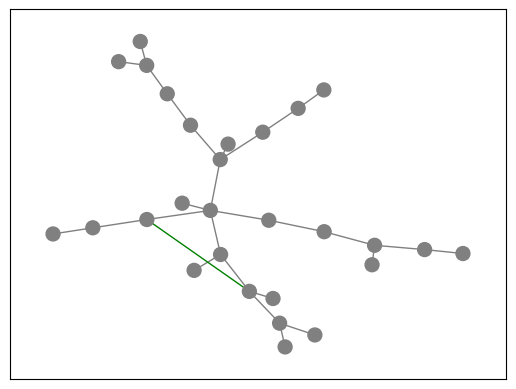

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, bi_cf, position=pos)

# End Paper Experiments

In [ ]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [ ]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

In [ ]:
pos = data_analyzer.draw_graph(og_inst)

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)